**Note:** Before running any code cells, please make sure the files `model.xyz`, `dump.xyz`, and `UNEP-v1-model-with-ZBL.txt` are in the same directory as this notebook. This ensures all structure and potential files can be read successfully after uploading or sharing.

# Fatigue Simulation Tutorial
This tutorial demonstrates how to perform uniaxial fatigue simulations using GPUMD, analyzing the structural evolution of materials under cyclic loading.

References:
1. https://doi.org/10.1063/5.0259061
2. Song, K., Zhao, R., Liu, J. et al. General-purpose machine-learned potential for 16 elemental metals and their alloys. Nat Commun 15, 10208 (2024). https://doi.org/10.1038/s41467-024-54554-x

## File Structure and Purpose
- `create-run.sh`: Shell script to automatically generate the simulation parameter file `run.in`.
- `run.in`: GPUMD input file, defines potential, loading method, output settings, etc.
- `UNEP-v1-model-with-ZBL.txt`: Machine-learned potential file describing atomic interactions.
- `model.xyz`: Initial structure file containing atom types and coordinates.
- `dump.xyz`: Output structure file from the simulation.
- `z.sh`: Job submission script (for HPC environments).

In [1]:
# Read and check the potential file and initial structure
potential_file = 'UNEP-v1-model-with-ZBL.txt'
structure_file = 'model.xyz'

# Check if the potential file exists
import os
print('Potential file exists:', os.path.exists(potential_file))

# Read the initial structure
with open(structure_file, 'r') as f:
    lines = f.readlines()
print('Number of atoms:', lines[0].strip())
print('Lattice parameters:', lines[1].strip())
print('First 5 atoms:', lines[2:7])

Potential file exists: True
Number of atoms: 16000
Lattice parameters: Lattice="64.0 0.0 0.0 0.0 64.0 0.0 0.0 0.0 64.0" Properties=species:S:1:pos:R:3 pbc="T T T"
First 5 atoms: ['Cu      54.40000000      38.40000000       3.20000000\n', 'Cu      60.80000000      54.40000000       0.00000000\n', 'Cu      52.80000000      59.20000000       1.60000000\n', 'Cu      38.40000000      35.20000000       6.40000000\n', 'Cu      46.40000000      56.00000000       8.00000000\n']


In [2]:
# Automatically count the number of fatigue cycles in run.in
runin_file = 'run.in'
with open(runin_file, 'r') as f:
    content = f.read()

# Example: Count the number of cycles
import re
cycles = re.findall(r'#cycle \d+', content)
print('Number of defined cycles:', len(cycles))

# You can insert new cycle settings as needed

Number of defined cycles: 50


## Run GPUMD Simulation
In Linux/WSL/Git Bash, use the following command to run GPUMD:

```bash
./gpumd run.in
```

(Make sure GPUMD is installed and the executable is in the current directory or in your PATH)

In [3]:
# Analyze dump.xyz output structure (Example: count atom types)
dump_file = 'dump.xyz'
species_count = {}
with open(dump_file, 'r') as f:
    for line in f:
        if line.startswith(('Cu', 'Mo', 'Al', 'Cr', 'Ni', 'Zr', 'Ag', 'Au', 'Mg', 'Pb', 'Pd', 'Pt', 'Ta', 'Ti', 'V', 'W')):
            sp = line.split()[0]
            species_count[sp] = species_count.get(sp, 0) + 1
print('Number of atoms for each element:', species_count)

Number of atoms for each element: {'Time=0.00000000': 1, 'Cu': 2352, 'Mo': 84000, 'Ta': 99456, 'V': 57120, 'W': 93072, 'Time=10000.00000000': 1, 'Time=20000.00000000': 1, 'Time=29999.99999999': 1, 'Time=39999.99999999': 1, 'Time=50000.00000000': 1, 'Time=60000.00000001': 1, 'Time=70000.00000003': 1, 'Time=80000.00000004': 1, 'Time=90000.00000006': 1, 'Time=100000.00000007': 1, 'Time=110000.00000009': 1, 'Time=120000.00000010': 1, 'Time=130000.00000012': 1, 'Time=140000.00000013': 1, 'Time=150000.00000015': 1, 'Time=160000.00000016': 1, 'Time=170000.00000015': 1, 'Time=180000.00000007': 1, 'Time=189999.99999999': 1, 'Time=199999.99999991': 1}


install ase as dependency

!pip install ase

In [7]:
!pip install ase

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 1.3 MB/s eta 0:00:02
   ---------- ----------------------------- 0.8/2.9 MB 1.4 MB/s eta 0:00:02
   ----------------- ---------------------- 1.3/2.9 MB 1.6 MB/s eta 0:00:02
   --------------------- ------------------ 1.6/2.9 MB 1.7 MB/s eta 0:00:01
   -------------------------------- ------- 2.4/2.9 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------  2.9/2.9 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 2.0 MB/s eta 0:00:00


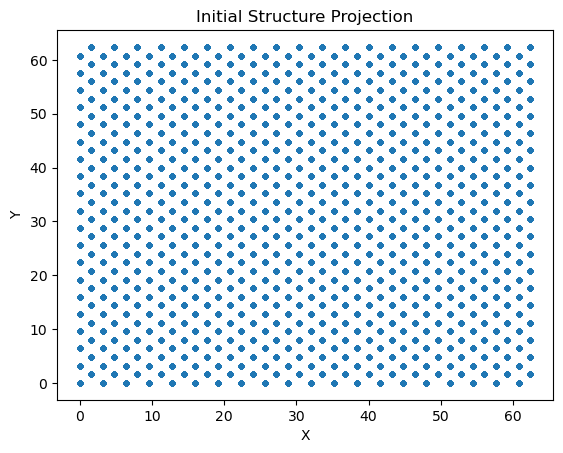

In [8]:
# Visualize atomic structure (requires ase and matplotlib)
from ase.io import read
import matplotlib.pyplot as plt

atoms = read('model.xyz')
positions = atoms.get_positions()
plt.scatter(positions[:,0], positions[:,1], s=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Initial Structure Projection')
plt.show()